Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [20]:
NAME = "Mayank Dahiya"
COLLABORATORS = "W3Schools , GeeksforGeeks , Class Notes"

---

## CSL2050: Pattern Recognition and Machine Learning<br>
Programming Assignemnt-3<br>
Spring 2025<br>

Q1. Please take this **Honesty Pledge** by reading and copying it and writing your full name in capital letters:

``I affirm that this assignment is solely my work. I have not used unauthorised assistance, engaged in plagiarism, or violated ethical standards, to the best of my knowledge. Further, all references used and any discussion with anyone have been appropriately cited. Any breach may lead to disciplinary actions as per the course academic honesty policy discussed in Lecture-1."

In this assignment, we shall implement a binary decision tree from scratch. The Input/Output for decision tree construction is given here:
**Input:**
Data: Feature matrix (shape: 𝑛×𝑚, where 𝑛 is the number of samples, 𝑚 is the number of features).

labels: Target labels (shape: 𝑛×1).

max_depth: Maximum depth of the tree.

**Output:**
A trained decision tree.

Q2. **Step-1: Compute entropy based on category-wise distribution of data**

\\( H(Y) = -\sum_{i=1}^{C} p_i log_2(p_i) \\)

where C is the number of categories and \\( p_i \\) is probability of ith category.

We will implement a function entropy that takes the labels of all data samples as input. The function will first compute the probability \\( p_i \\) each unique category in the labels. Then, using these probabilities, it will calculate and return the entropy.

# Example usage
labels = ['A', 'A', 'B', 'B']  #labels can be 0,1,2 or any non numeric values
print(entropy(labels))  # will print 1    


In [21]:

import numpy as np

def entropy(labels):
    """Compute entropy of the data with labels."""
    # Get unique labels and their count
    unique_labels, counts = np.unique(labels, return_counts=True)

    # Calculate probability for each unique label
    probabilities = counts / len(labels)

    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

In [22]:
# AUTOGRADER TEST CASE - VISIBLE

assert entropy(np.array([1, 1, 1, 1])) == 0.0, "Test case 1 failed: Expected entropy 0.0"
assert np.isclose(entropy(np.array([0, 0, 1, 1])), 1.0), "Test case 2 failed: Expected entropy 1.0"
assert np.isclose(entropy(np.array([0, 0, 0, 1])), -(0.75 * np.log2(0.75) + 0.25 * np.log2(0.25))), "Test case 3 failed"
print("✅ All visible test cases passed!")

# AUTOGRADER TEST CASE - HIDDEN



✅ All visible test cases passed!


Q3. **Step 2: Compute Information Gain**

Implement a function compute_information_gain that takes (i) data -- Feature matrix (shape: 𝑛×𝑚, where 𝑛 is the number of samples, 𝑚 is the number of features), (ii) feature_index -- an integer that is used to select a feature to evaluate its suitability to split the dataset, and (iii) the list of class labels, and it returns info_gain and threshold if that particular feature_index is chosen.

Note that here you are supposed to compute information gain based on gain in entropy.

In [23]:
def compute_information_gain(data, feature_index, labels):
    """
    Computes information gain of a feature for a given dataset.

    Parameters:
    data (np.array): Feature matrix of shape (n_samples, n_features)
    feature_index (int): Index of the feature to compute IG
    labels (list or np.array): List of class labels

    Returns:
    float: Information gain
    """
    # Calculate the initial entropy of the dataset before splitting
    initial_entropy = entropy(labels)

    # Find the unique values of the selected feature and use them as potential threshold
    unique_values = np.unique(data[:, feature_index])

    # Initialize variables to store the best information gain and threshold.
    best_info_gain = 0
    best_threshold = None

    # Iterate through each unique value
    for threshold in unique_values:
        # Split the data into two subsets based on the threshold
        left_indices = data[:, feature_index] <= threshold
        right_indices = data[:, feature_index] > threshold

        # Calculate the entropy of each subset
        left_entropy = entropy(labels[left_indices])
        right_entropy = entropy(labels[right_indices])

        # Calculate the weighted average entropy after the split
        weighted_entropy = (len(labels[left_indices]) / len(labels)) * left_entropy + \
                          (len(labels[right_indices]) / len(labels)) * right_entropy

        # Calculate the information gain for this threshold
        info_gain = initial_entropy - weighted_entropy

        # Update the best information gain and threshold
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_threshold = threshold

    # Return the best information gain and threshold.
    return best_info_gain, best_threshold

In [24]:
data = np.array([[1, 0], [1, 1], [0, 1], [0, 0]])
labels = np.array([0, 1, 1, 0])
info_gain, threshold=compute_information_gain(data, 0, labels)
assert np.isclose(info_gain, 0.0, atol=0.01)


Q4. **Step 3: Find the Best Feature and Threshold**

The best feature is the one that gives maximum information gain. Use every feature and find out the one that gives the best split.

In [25]:
def best_split(data, labels):
    """Find the best feature and threshold for splitting."""
    best_info_gain = 0  # Initialize best information gain
    best_feature = None  # Initialize best feature index
    best_threshold = None  # Initialize best threshold

    num_features = data.shape[1]  # Get number of features

    # Iterate through each feature
    for feature_index in range(num_features):
        # Calculate information gain for current feature
        info_gain, threshold = compute_information_gain(data, feature_index, labels)

        # Update best values
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature_index
            best_threshold = threshold

    # Return the best feature index, threshold, and information gain
    return best_feature, best_threshold

Q5. **Step 4: Recursive Tree Building**

Now, we will build the decision tree. We are providing code for this segment. Your task is to understand each line of this code.

In [26]:
class DecisionTreeNode:
    """Class for a decision tree node."""
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.root = None

    def fit(self, data, labels, depth=0):
        """Recursively builds the decision tree."""
        #Stop splitting if pure or max depth reached
        if depth == self.max_depth or len(np.unique(labels)) == 1: #Why?
            return DecisionTreeNode(value=np.bincount(labels).argmax()) #Why?

        # Find best feature and threshold
        best_feature, best_threshold = best_split(data, labels)

        # Partition data
        left_mask = data[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        # Prevent infinite splitting
        if np.all(left_mask) or np.all(right_mask):
            return DecisionTreeNode(value=np.bincount(labels).argmax())

        left_child = self.fit(data[left_mask], labels[left_mask], depth + 1)
        right_child = self.fit(data[right_mask], labels[right_mask], depth + 1)

        return DecisionTreeNode(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def train(self, data, labels):
        """Initialize tree training."""
        self.root = self.fit(data, labels, depth=0)


Q6. Next, please review and understand the following code that is used to predict the class

In [27]:
def predict_sample(node, sample):
    """Recursively predict the label for a single sample."""
    if node.value is not None:
        return node.value
    if sample[node.feature] <= node.threshold:
        return predict_sample(node.left, sample)
    else:
        return predict_sample(node.right, sample)

def predict(tree, data):
    """Predict labels for multiple samples."""
    return np.array([predict_sample(tree.root, sample) for sample in data])


Q7. Now, we provide a code that generates a synthetic dataset of two features, and fits the decision tree implemented above and computes accuracy. You are supposed to complete some tasks given in the below code segment:

[[ 0.77144029 -1.26233499]
 [-1.2921157  -0.40911066]
 [-1.42722051  1.6193163 ]
 ...
 [ 1.04275178 -1.33012838]
 [-0.90758902  0.85881751]
 [-0.53049771 -1.33108209]]
(7000, 2) (3000, 2)
Test Accuracy: 0.92
(5600, 2) (1400, 2) (3000, 2)
Train Accuracy: 0.94
Validation Accuracy: 0.93


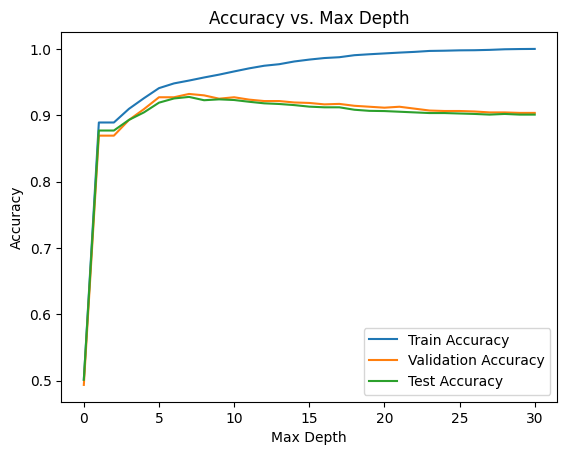

In [28]:
!pip install scikit-learn
# Generate synthetic dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Ensure n_informative + n_redundant <= n_features
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)  # Check dataset shape

# Train the decision tree
tree = DecisionTree(max_depth=5)
tree.train(X_train, y_train)

# Make prediction
y_pred = predict(tree, X_test)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")


## Task-0: Write code to have 20% of train data to be used as validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

## Task-1: Write code to compute accuracy on train set
y_pred_train = predict(tree, X_train)
train_accuracy = np.mean(y_pred_train == y_train)
print(f"Train Accuracy: {train_accuracy:.2f}")


## Task-2: Write code to compute accuracy on val set
y_pred_val = predict(tree, X_val)
val_accuracy = np.mean(y_pred_val == y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")


## Task-3: Change max_depth from 0 to 30 and note train/val/test accuracy for each depth and plot them
import matplotlib.pyplot as plt

train_accuracies = []
val_accuracies = []
test_accuracies = []

depths = range(0, 31)  # max_depth values from 0 to 30

for depth in depths:
    tree = DecisionTree(max_depth=depth)
    tree.train(X_train, y_train)

    y_pred_train = predict(tree, X_train)
    train_accuracies.append(np.mean(y_pred_train == y_train))

    y_pred_val = predict(tree, X_val)
    val_accuracies.append(np.mean(y_pred_val == y_val))

    y_pred_test = predict(tree, X_test)
    test_accuracies.append(np.mean(y_pred_test == y_test))

# Plotting the results
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, val_accuracies, label='Validation Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.legend()
plt.show()

Q8. In your implementation of compute_information_gain, how was the threshold for numerical features chosen? Point out to your code where this is done.

The threshold for numerical features is chosen by evaluating all unique values of the feature as potential thresholds. The threshold that maximizes the information gain is selected as the best threshold.
```
unique_values = np.unique(data[:, feature_index])
for threshold in unique_values:     
  if info_gain > best_info_gain:
    best_info_gain = info_gain
    best_threshold = threshold
```


Q9. What happens when the decision tree is allowed to grow too deep? Based on your observation for this assignment, write the response.

When a decision tree is allowed to grow too deep(meaning it has too many levels and decision nodes), it can lead to overfitting.

Overfitting is a phenomenon where the model learns the training data too well, including its noise and outliers. As a result, the model performs very accurately on the training data but poorly on unseen data (validation or test data).


*   As max_depth increases, the training accuracy tends to improve and may even reach 100%.
*   However, the validation accuracy starts to decrease after a certain point.
*   The test accuracy also follows a similar trend as the validation accuracy.

Q10. How would you prevent overfitting in your implementation? Suggest two different methods.

1. Pruning: Pruning involves removing parts of the tree (branches or nodes) that are not contributing significantly to the model's predictive power. It helps simplify the tree and reduce its complexity.

2. Limiting Tree Depth: This approach directly controls the complexity of the tree by setting a maximum depth. The tree is not allowed to grow beyond this depth, which restricts the number of decision boundaries it can create.

Q11. What other design choices could you have chosen for implementing the decision tree? List them out.

1. Gini impurity: Another common splitting criterion that measures the probability of misclassifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the subset.
2. Pruning Strategy:
Instead of (or in addition to) limiting the tree depth, different pruning strategies could have been employed

Q12. Cite all the web sources or help from individuals you have taken to complete this assignment.

W3Schools , GeeksforGeeks , Class Notes